In [ ]:
Digit Recognizer kaggle competition

# Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/antoine/Documents/Tests/python/ML/venv3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [2]:
!head train.csv

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
target = df["label"]
df.drop("label", inplace=True, axis=1)

# 0- Data vizualisation - preprocessing

In [7]:
from keras.utils import to_categorical

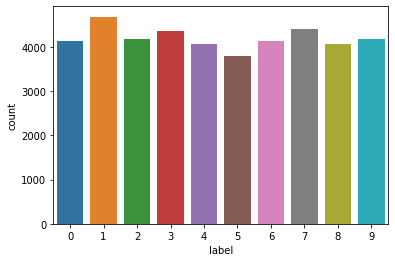

In [8]:
target.value_counts()
g = sns.countplot(target)

In [9]:
train_df = df /255

In [144]:
#train_df.values.reshape ?? (-1,28,28,1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_train_arr = to_categorical(target)
y_train_arr

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# 1- First cnn with keras

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
early_stopping_moni = EarlyStopping(patience=4)

In [13]:
model = Sequential()
model.add(Dense(700, input_dim=784, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#model.fit(train_df, y_train_arr)
#model.fit(train_df, y_train_arr, epochs=150, batch_size=10)
model.fit(train_df, y_train_arr, epochs=50, validation_split=0.3, callbacks=[early_stopping_moni] )


Train on 29399 samples, validate on 12601 samples
Epoch 1/50
29399/29399 [==============================] - 9s 292us/step - loss: 0.2528 - accuracy: 0.9229 - val_loss: 0.1209 - val_accuracy: 0.9644
Epoch 2/50
29399/29399 [==============================] - 10s 332us/step - loss: 0.1141 - accuracy: 0.9658 - val_loss: 0.1171 - val_accuracy: 0.9641
Epoch 3/50
29399/29399 [==============================] - 9s 309us/step - loss: 0.0810 - accuracy: 0.9742 - val_loss: 0.1139 - val_accuracy: 0.9675
Epoch 4/50
29399/29399 [==============================] - 9s 312us/step - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.1265 - val_accuracy: 0.9679
Epoch 5/50
29399/29399 [==============================] - 9s 309us/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.1223 - val_accuracy: 0.9710
Epoch 6/50
29399/29399 [==============================] - 9s 317us/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 0.1249 - val_accuracy: 0.9706
Epoch 7/50
29399/29399 [==============================] - 10

In [16]:
_, accuracy = model.evaluate(train_df, y_train_arr)
print('Accuracy: %.2f' % (accuracy*100))

42000/42000 [==============================] - 2s 39us/step
Accuracy: 98.65


In [17]:
!ls

README.md                 result_cnn.csv            titanic_train.ipynb
digit_recognition.ipynb   result_cnn_normalized.csv train.csv
keras_dl.ipynb            test.csv


# 2- Kaggle Test data

In [18]:
datatest = loadtxt("test.csv", delimiter=",", skiprows=1)

In [19]:
datatest_df = pd.DataFrame(datatest)

In [20]:
datatest_normalized = datatest_df/255
preds_normalized = model.predict_classes(datatest_normalized)
pred_normalized_df = pd.DataFrame(preds_normalized)

In [21]:
result_df = pd.DataFrame({"ImageId":np.arange(1, len(preds_normalized)+1),
                          "Label":preds_normalized})

In [22]:
result_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [23]:
result_df.to_csv("result_cnn_normalized.csv", index=False)

In [ ]:
#Test with sgd optimizer

In [26]:
early_stopping_moni = EarlyStopping(patience=4)
model2 = Sequential()
model2.add(Dense(700, input_dim=784, activation='relu'))
model2.add(Dense(700, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [27]:
model2.fit(train_df, y_train_arr, epochs=50, validation_split=0.3, callbacks=[early_stopping_moni])

Train on 29399 samples, validate on 12601 samples
Epoch 1/50
29399/29399 [==============================] - 4s 140us/step - loss: 0.7674 - accuracy: 0.8201 - val_loss: 0.3861 - val_accuracy: 0.8938
Epoch 2/50
29399/29399 [==============================] - 4s 138us/step - loss: 0.3379 - accuracy: 0.9051 - val_loss: 0.2985 - val_accuracy: 0.9168
Epoch 3/50
29399/29399 [==============================] - 4s 142us/step - loss: 0.2805 - accuracy: 0.9209 - val_loss: 0.2647 - val_accuracy: 0.9228
Epoch 4/50
29399/29399 [==============================] - 4s 144us/step - loss: 0.2462 - accuracy: 0.9297 - val_loss: 0.2369 - val_accuracy: 0.9329
Epoch 5/50
29399/29399 [==============================] - 4s 139us/step - loss: 0.2206 - accuracy: 0.9365 - val_loss: 0.2154 - val_accuracy: 0.9385
Epoch 6/50
29399/29399 [==============================] - 4s 137us/step - loss: 0.1992 - accuracy: 0.9435 - val_loss: 0.2033 - val_accuracy: 0.9406
Epoch 7/50
29399/29399 [==============================] - 4s 1

In [28]:
_, accuracy = model2.evaluate(train_df, y_train_arr)
print('Accuracy: %.2f' % (accuracy*100))

42000/42000 [==============================] - 1s 31us/step
Accuracy: 99.06


In [31]:
preds_normalized2 = model2.predict_classes(datatest_normalized)
pred_normalized_df2 = pd.DataFrame(preds_normalized2)
result_df = pd.DataFrame({"ImageId":np.arange(1, len(pred_normalized_df2)+1),
                          "Label":preds_normalized2})

In [32]:
result_df.to_csv("result_cnn_normalized_sgd.csv", index=False)